<a href="https://colab.research.google.com/github/koya-ken/deep-learning/blob/master/pytorch_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [ ]:
# PyTorch Modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import torchvision.transforms as transforms
from torch.utils.data.dataset import Subset
import torchvision.models as models
import torch.optim as optim
from torchvision.utils import make_grid, save_image

In [ ]:
!pip install pytorch-gradcam

     |████████████████████████████████| 6.0MB 4.4MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp36-none-any.whl size=5269 sha256=cdb98cda5cbb20105fe02211e1ce6c5b8574c01c2c8d17765c20d69f5258ff7d
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [ ]:
# Grad-CAM
from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

In [ ]:
model = models.densenet161(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [ ]:
fc = list(model.modules())[-2]
output = list(model.modules())[-1]

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available()  else "cpu")
model = models.densenet161(pretrained=True)
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
!mkdir image

In [ ]:
!wget -q -O image/dog1.jpg 'https://dol.ismcdn.jp/mwimgs/7/1/670m/img_71c53c1d81500a1cf73a4f543e72413f27838.jpg'
!wget -q -O image/dog2.jpg 'https://www.min-petlife.com/data/article/239797/main_239797_cd32b_detail.jpg'
!wget -q -O image/dog3.jpg 'https://ranking.xgoo.jp/tool/images/column/2020/01/0121_6.jpg'
!wget -q -O image/dog4.jpg 'https://www.hcced.jp/wp-content/uploads/2019/08/9f4f0468c57e70b751b03fa424cd2767.jpg'

!wget -q -O image/human1.jpg 'https://otokomaeken.com/wp-content/uploads/2019/08/DSC_1271.jpg'

image/human1.jpg


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


image/dog4.jpg
image/dog3.jpg
image/dog1.jpg
image/dog2.jpg


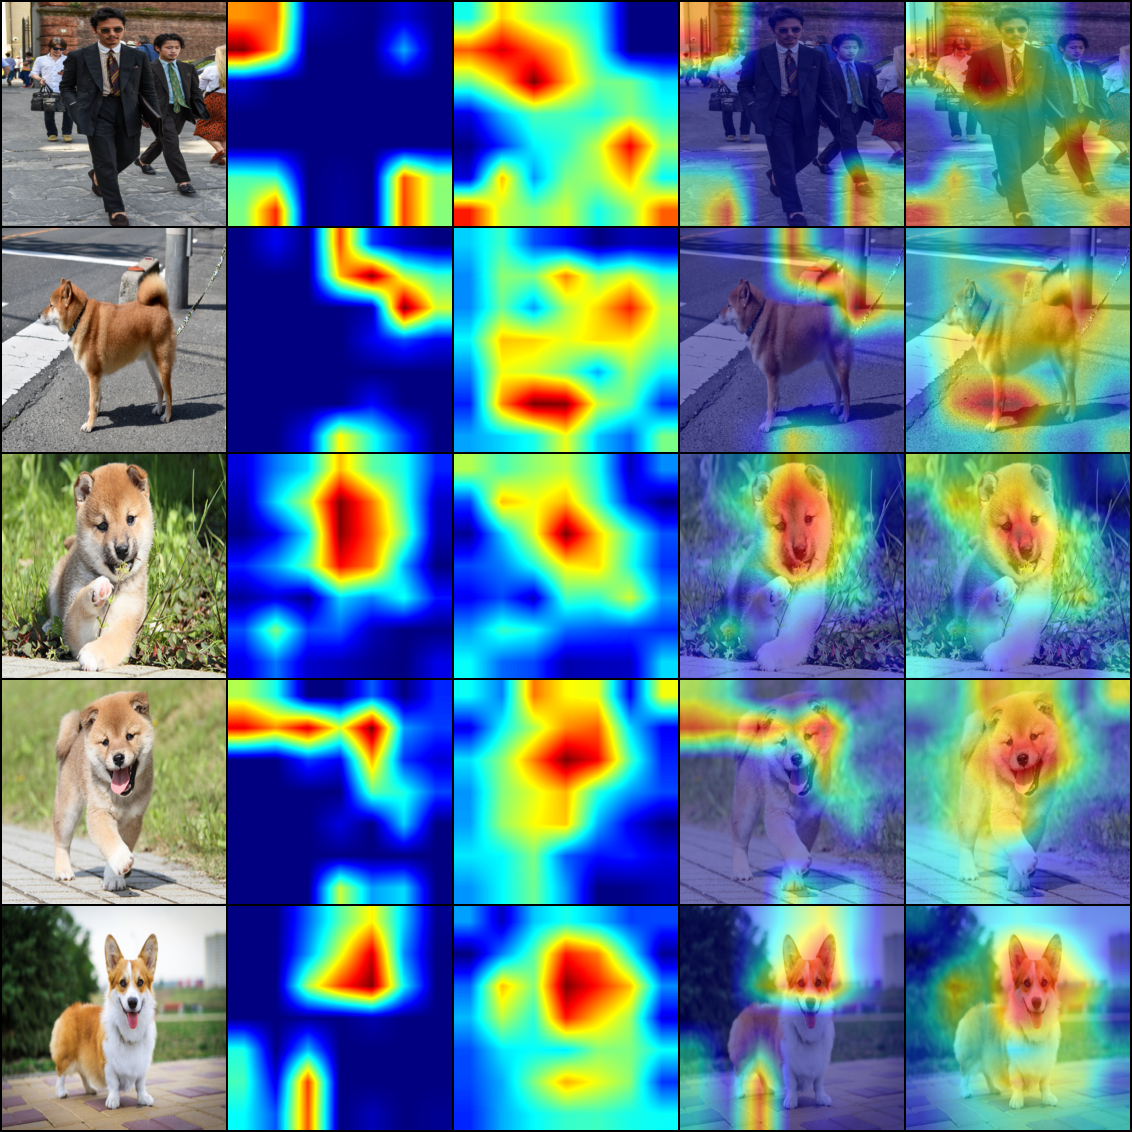

In [ ]:
target_layer = model.features.denseblock1.denselayer6
target_layer = model.features.denseblock2.denselayer12
target_layer = model.features.denseblock3.denselayer36
target_layer = model.features.denseblock4.denselayer24

target_layer = model.features.denseblock4.denselayer12

gradcam = GradCAM(model, target_layer)
gradcam_pp = GradCAMpp(model, target_layer)

images = []
for path in glob.glob("{}/*".format('image')):
  print(path)
  img = Image.open(path)
  torch_img = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor()
  ])(img).to(device)
  normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_img)[None]
  mask, _ = gradcam(normed_torch_img)
  heatmap, result = visualize_cam(mask, torch_img)

  mask_pp, _ = gradcam_pp(normed_torch_img)
  heatmap_pp, result_pp = visualize_cam(mask_pp, torch_img)

  images.extend([torch_img.cpu(), heatmap, heatmap_pp, result, result_pp])

grid_image = make_grid(images, nrow=5)
transforms.ToPILImage()(grid_image)